# PYTHON CODE FOR FEATURE SELECTION USING SFS FOR REGRESSION

# Read Dataset

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
X = df.drop(['total_bedrooms'], axis=1)
y = df['total_bedrooms']

# Feature Selection using SFS with Linear Regression as the Criterion Function

In [ ]:
# Install mlxtend library (Optional)
# pip install mlxtend --upgrade --no-deps

In [ ]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# Informasi terkait scoring untuk regresi dapat dilihat di web
# https://scikit-learn.org/stable/modules/model_evaluation.html
# https://www.youtube.com/watch?v=0vCXcGJg5Bo
lr = LinearRegression()

sfs = SFS(lr,
          k_features=2, # bisa pilih "best" saja atau angka
          forward=True,
          floating=True,
          scoring='neg_mean_squared_error', # Default is neg_mean_squared_error, to use r square just write 'r2'
          cv=10)

sfs = sfs.fit(X, y)

In [ ]:
# # Feature Selection using SFS with XGBoost as the Criterion Function (30 Minutes)
# from xgboost import XGBRegressor
# # Informasi terkait scoring untuk regresi dapat dilihat di web
# # https://scikit-learn.org/stable/modules/model_evaluation.html

# >>> xg = XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')

# >>> sfs = SFS(xg,
#           k_features='best', # bisa pilih "best" saja atau angka
#           forward=True,
#           floating=True,
#           scoring='neg_mean_squared_error', # Default is neg_mean_squared_error, to use r square just write 'r2'
#           cv=10)

# >>> sfs = sfs.fit(X, y)
# >>> sfs.k_feature_idx_
# (0, 3, 4, 5, 6)

In [ ]:
sfs.k_feature_idx_

(0, 1)

In [ ]:
X

array([[5.6120e+03, 4.7200e+02, 1.4936e+00],
       [7.6500e+03, 4.6300e+02, 1.8200e+00],
       [7.2000e+02, 1.1700e+02, 1.6509e+00],
       ...,
       [2.6770e+03, 4.5600e+02, 3.0313e+00],
       [2.6720e+03, 4.7800e+02, 1.9797e+00],
       [1.8200e+03, 2.7000e+02, 3.0147e+00]])

In [ ]:
sfs.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([-34676.36158406,  -4661.92500724,  -1569.47913939,  -1082.62139846,
          -1855.5607668 ,  -5975.84454558, -11442.64531815,  -2157.01732337,
          -1605.55163549,  -2903.60356147]),
  'avg_score': -6793.061028000116,
  'feature_names': ('1',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([-30237.34844041,  -5376.26383543,  -1954.2921529 ,  -2160.34860316,
          -3863.12417122,  -5632.17485084,  -8582.8165311 ,  -2881.64681405,
          -2557.63326521,  -3055.99418453]),
  'avg_score': -6630.164284885633,
  'feature_names': ('0', '1')}}

# Plot SFS Graph for Linear Regression Criterion Function

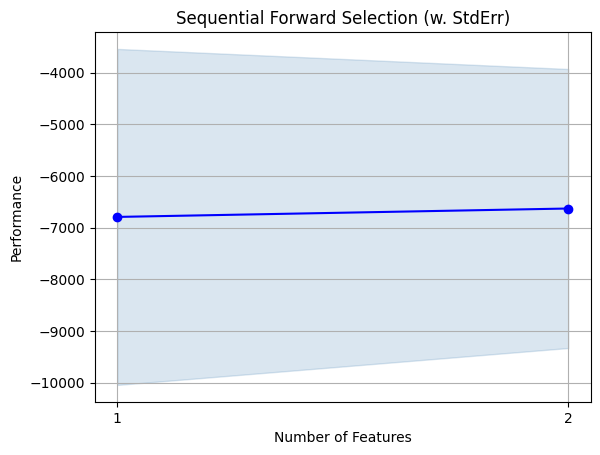

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

# Transform Dataset into new Dataset with indexed from SFS

In [ ]:
df_new = sfs.transform(X)
df_new

array([[5612.,  472.],
       [7650.,  463.],
       [ 720.,  117.],
       ...,
       [2677.,  456.],
       [2672.,  478.],
       [1820.,  270.]])

In [ ]:
X , y  = df_new, df['total_bedrooms']
X

array([[5612.,  472.],
       [7650.,  463.],
       [ 720.,  117.],
       ...,
       [2677.,  456.],
       [2672.,  478.],
       [1820.,  270.]])

In [ ]:
y

0        1283.0
1        1901.0
2         174.0
3         337.0
4         326.0
          ...  
16995     394.0
16996     528.0
16997     531.0
16998     552.0
16999     300.0
Name: total_bedrooms, Length: 17000, dtype: float64

# Preprocessing Dataset

In [ ]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train # Dataframe

array([[1280.,  252.],
       [4712.,  615.],
       [2781.,  729.],
       ...,
       [ 901.,  208.],
       [3648.,  840.],
       [2452.,  549.]])

In [ ]:
y_train

9432     240.0
13901    624.0
6832     766.0
5226     374.0
16888    506.0
         ...  
11284    475.0
11964    144.0
5390     205.0
860      895.0
15795    623.0
Name: total_bedrooms, Length: 11390, dtype: float64

# Modelling

$Y = β_0 + β_1X + β_2X_2 + … + β_hX_h + ε$

In [ ]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
model_lr = LinearRegression()

# Train the model using the training sets
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Print The Regression Coefficients
model_lr.coef_

array([0.03644297, 0.88575825])

In [ ]:
print('Coefficients: ', model_lr.coef_)

Coefficients:  [0.03644297 0.88575825]


In [ ]:
# Print The Regression Intercept/Bias
model_lr.intercept_

-0.39041089074419233

In [ ]:
print('Intercept: ', model_lr.intercept_)

Intercept:  -0.39041089074419233


# Testing the Model

In [ ]:
y_tr_pred = model_lr.predict(X_train)
y_tr_pred

array([269.46767092, 716.07019318, 746.67525485, ..., 216.68242181,
       876.59047665, 575.24903286])

In [ ]:
y_te_pred = model_lr.predict(X_test)
y_te_pred

array([ 993.47554741,  466.24013144,  752.00429684, ...,  498.17081413,
       1476.45673526,  358.17119763])

# Performance Evaluation Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Performance Evaluation on Training Data
lr_train_rms = np.sqrt(mean_squared_error(y_tr_pred,y_train))
lr_train_r2 = r2_score(y_tr_pred,y_train)
# lr_train_mae = mean_absolute_error(y_tr_pred,y_train)
# lr_train_mape = mean_absolute_percentage_error(y_tr_pred,y_train)
lr_train_mse = mean_squared_error(y_tr_pred,y_train)

print('Root Mean Square Error: ', lr_train_rms)
print('R2 Scored: ', lr_train_r2)
# print('Mean Absolute Error: ', lr_train_mae)
# print('Mean Absolute Percentage Error: ', lr_train_mape)
print('Mean Square Error: ', lr_train_mse)

Root Mean Square Error:  80.2609503196811
R2 Scored:  0.9635621651728141
Mean Square Error:  6441.820146218318


In [ ]:
# Performance Evaluation on Testing Data
lr_test_rms = np.sqrt(mean_squared_error(y_te_pred,y_test))
lr_test_r2 = r2_score(y_te_pred,y_test)
# lr_test_mae = mean_absolute_error(y_te_pred,y_test)
# lr_test_mape = mean_absolute_percentage_error(y_te_pred,y_test)
lr_test_mse = mean_squared_error(y_te_pred,y_test)

print('Root Mean Square Error: ', lr_test_rms)
print('R2 Scored: ', lr_test_r2)
# print('Mean Absolute Error: ', lr_test_mae)
# print('Mean Absolute Percentage Error: ', lr_test_mape)
print('Mean Square Error: ', lr_test_mse)

Root Mean Square Error:  69.1235200858151
R2 Scored:  0.9705762024542627
Mean Square Error:  4778.0610290540835


# Plotting the Result

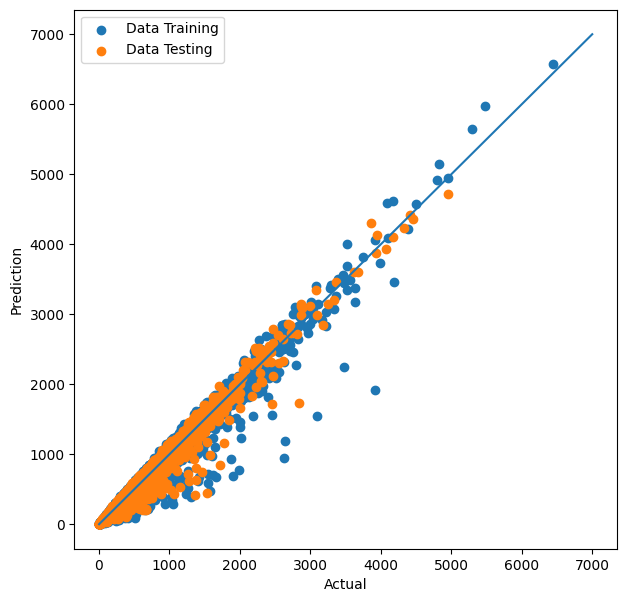

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y_train,y_tr_pred, label='Data Training')
plt.scatter(y_test,y_te_pred, label='Data Testing')
plt.plot([1,7000],[1,7000])

plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.show()